<a href="https://colab.research.google.com/github/johnnycleiton07/image-processing/blob/main/CInUFPE_pdi03_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2023.1 Especialização em Robótica: Processamento de Imagens**
# **Histogramas**
> **Monitoria 02.2 - PDI01** - Macela Zovka de Moraes Lemos


**Objetivo ~~~**
Este notebook tem por objetivo exemplificar os conteúdos abordados na aula 03 de PDI relativos a Histogramas e algumas de suas aplicações.

In [1]:
#Habilitando Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Visualizando histogramas de Imagens
Na aula 01 vimos um exemplo de Histograma de Imagem RGB...

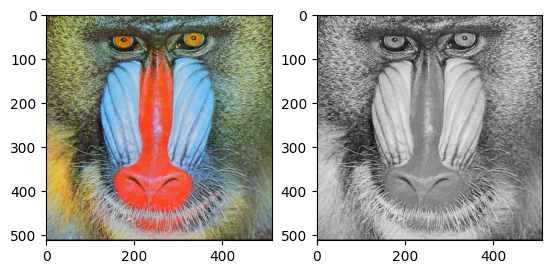

(512, 512, 3)
(512, 512)


In [2]:
#Declarando Bibliotecas
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#chamando imagens:
path = '/content/drive/MyDrive/MONITORIA/Imagens/BaboonRGB.bmp'
imgBGR = cv2.imread(path)
#Convertendo para RGB e Cinza
imgRGB = cv2.cvtColor(imgBGR,code=cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(imgRGB,code=cv2.COLOR_RGB2GRAY)

#Plyando com matplotlib
plt.subplot(121), plt.imshow(imgRGB)
plt.subplot(122), plt.imshow(img_gray,cmap='gray')
plt.show()

#Images shapes
print(imgRGB.shape)
print(img_gray.shape)

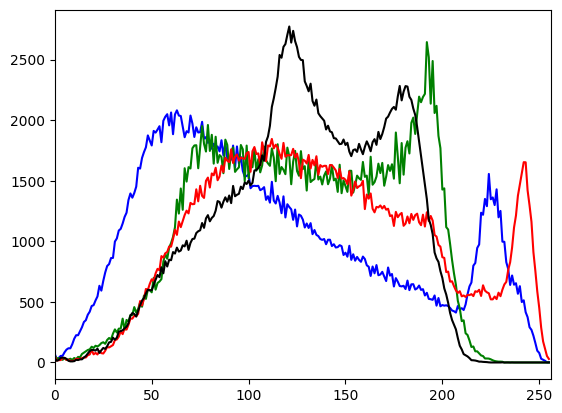

In [3]:
#Histograma da Imagem BGR
color = ('b','g','r')
for i,col in enumerate(color):
    histrBGR = cv2.calcHist([imgBGR],[i],None,[256],[0,256])
    plt.plot(histrBGR,color = col) #Histograma BGR
    plt.xlim([0,256])
#plt.show()

#Histograma da Imagem Cinza
histrGRAY = cv2.calcHist([img_gray],[],None,[256],[0,256])
plt.plot(histrGRAY,color = 'k') #Histograma Imagem Cinza
plt.show()

#Complemento

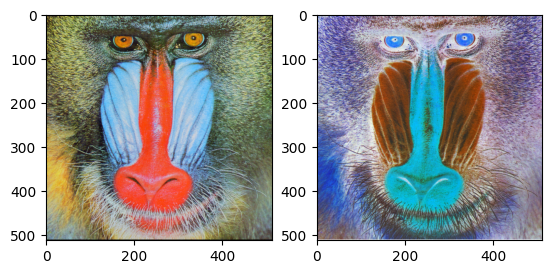

In [4]:
#Calculando imagem complemento
I = 255 - imgRGB
plt.subplot(121), plt.imshow(imgRGB)
plt.subplot(122), plt.imshow(I)
plt.show()

In [5]:
print('Imagem:', imgRGB[20,20,0])
print('Complemento:', I[20,20,0])
print('Soma:', imgRGB[20,20,0] + I[20,20,0])

Imagem: 69
Complemento: 186
Soma: 255


Histogramas da Imagem e Complemento na Escala de Cinza

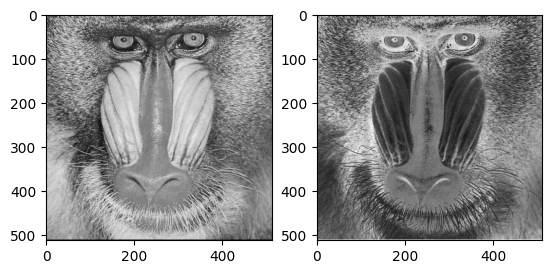

In [6]:
#Calculando imagem complemento
complemento_gray = 255 - img_gray
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.subplot(122), plt.imshow(complemento_gray, cmap='gray')
plt.show()

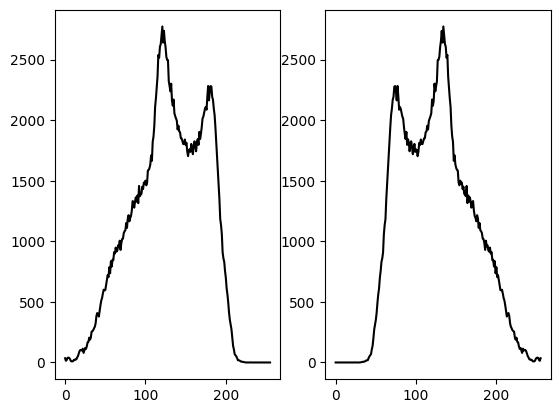

In [7]:
#Histogramas da Img e Complemento
histrGRAY1 = cv2.calcHist([img_gray],[],None,[256],[0,256])
histrGRAY2 = cv2.calcHist([complemento_gray],[],None,[256],[0,256])

plt.subplot(121), plt.plot(histrGRAY1, color = 'k')
plt.subplot(122), plt.plot(histrGRAY2, color = 'k')
plt.show()

#Binarização

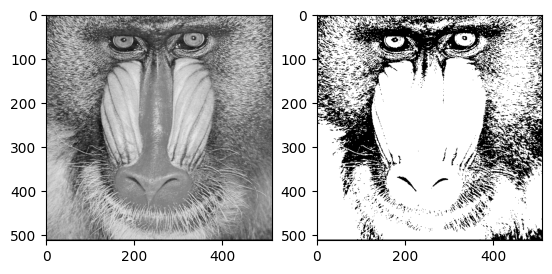

In [8]:
#CORTE 01
Corte01 = (img_gray>100)

plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.subplot(122), plt.imshow(Corte01, cmap='gray')
plt.show()

In [9]:
Corte01

array([[ True, False, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [False,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

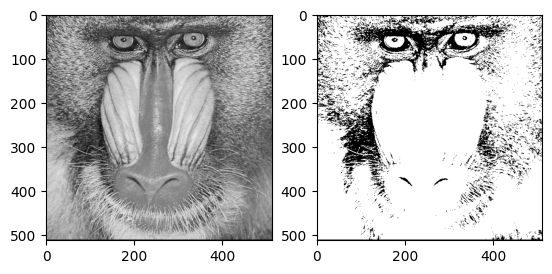

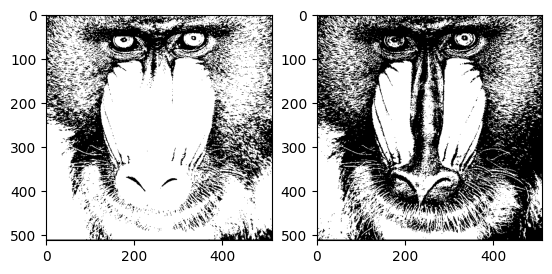

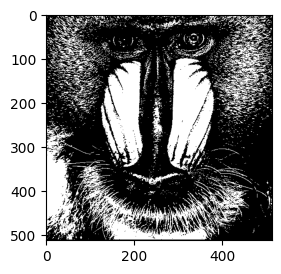

In [10]:
#CORTES
Corte01 = (img_gray>80)
Corte02 = (img_gray>100)
Corte03 = (img_gray>128)
Corte04 = (img_gray>150)


plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.subplot(122), plt.imshow(Corte01, cmap='gray')
plt.show()
plt.subplot(121), plt.imshow(Corte02, cmap='gray')
plt.subplot(122), plt.imshow(Corte03, cmap='gray')
plt.show()
plt.subplot(121), plt.imshow(Corte04, cmap='gray')
plt.show()

#Brilho

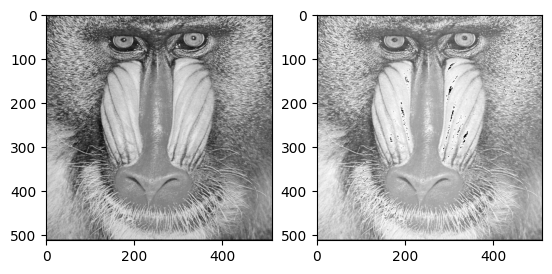

In [11]:
#Editando Brilho da Imagem
lum = 50     # -50, 0, 50
Brilho = img_gray + lum
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.subplot(122), plt.imshow(Brilho, cmap='gray')
plt.show()

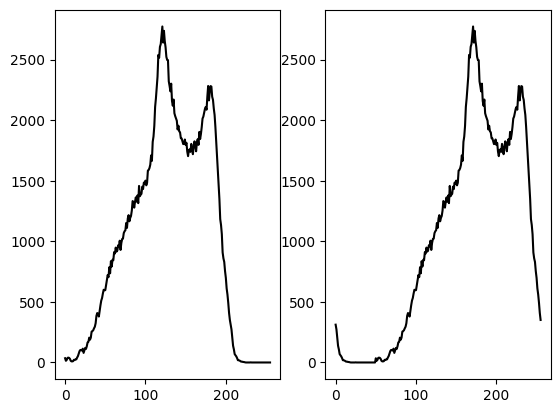

In [12]:
#Efeitos sobre Histogramas
histrBrilho = cv2.calcHist([Brilho],[],None,[256],[0,256])

plt.subplot(121), plt.plot(histrGRAY1, color = 'k')
plt.subplot(122), plt.plot(histrBrilho, color = 'k')
plt.show()

#Contraste

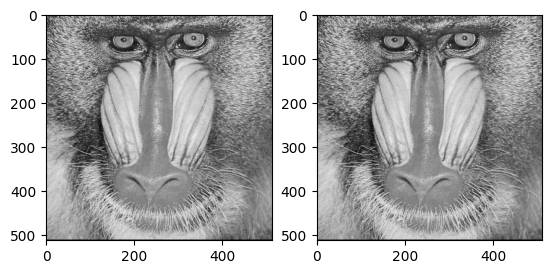

In [13]:
#Editando Contraste da Imagem
contr = 1.2     # Expansão: >1 ; Compressão 0<contr<1
Contraste = np.round(img_gray*contr)

plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.subplot(122), plt.imshow(Contraste, cmap='gray')
plt.show()

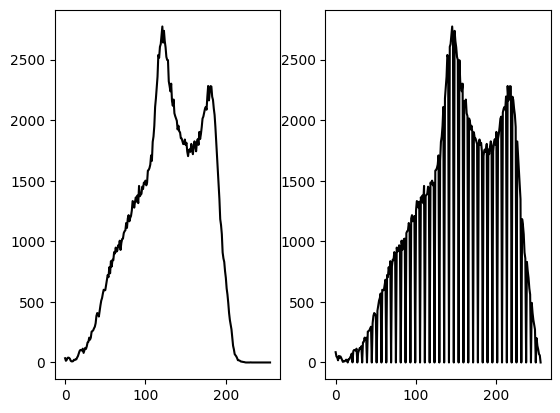

In [14]:
#Efeitos sobre Histogramas
Contraste=np.full((Contraste.shape),Contraste,dtype='uint8')
histrContraste = cv2.calcHist([Contraste],[],None,[256],[0,256])

plt.subplot(121), plt.plot(histrGRAY1, color = 'k')
plt.subplot(122), plt.plot(histrContraste, color = 'k')
plt.show()

In [15]:
img_gray

array([[145,  56,  49, ..., 113, 153, 177],
       [116, 101,  40, ..., 130, 149, 125],
       [ 77, 114,  46, ..., 100,  88,  81],
       ...,
       [141, 145, 141, ...,  83,  89,  78],
       [156, 141, 131, ...,  79,  80,  69],
       [ 11,  11,  13, ...,   7,   4,   4]], dtype=uint8)

In [16]:
Contraste

array([[174,  67,  59, ..., 136, 184, 212],
       [139, 121,  48, ..., 156, 179, 150],
       [ 92, 137,  55, ..., 120, 106,  97],
       ...,
       [169, 174, 169, ..., 100, 107,  94],
       [187, 169, 157, ...,  95,  96,  83],
       [ 13,  13,  16, ...,   8,   5,   5]], dtype=uint8)

#Limiarização / Binarização / Thresholding:
Thresholding transforma imagens em imagens binárias (exibido anteriormente na binarização. True or False, 0 ou 1, preto ou branco). Os intervalos de máximos e mínimos desejados pelo usuário são definidos para converter os valores dos pixels correspondentes.

```
cv2.threshold(img, thresh_value, maxVal, style)
```

  1.  *cv2.THRESH_BINARY*
  2.  *cv2.THRESH_BINARY_INV*
  3.  *cv2.THRESH_TRUNC*
  4.  *cv2.THRESH_TOZERO*
  5.  *cv2.THRESH_TOZERO_INV*


In [17]:
#Importing
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

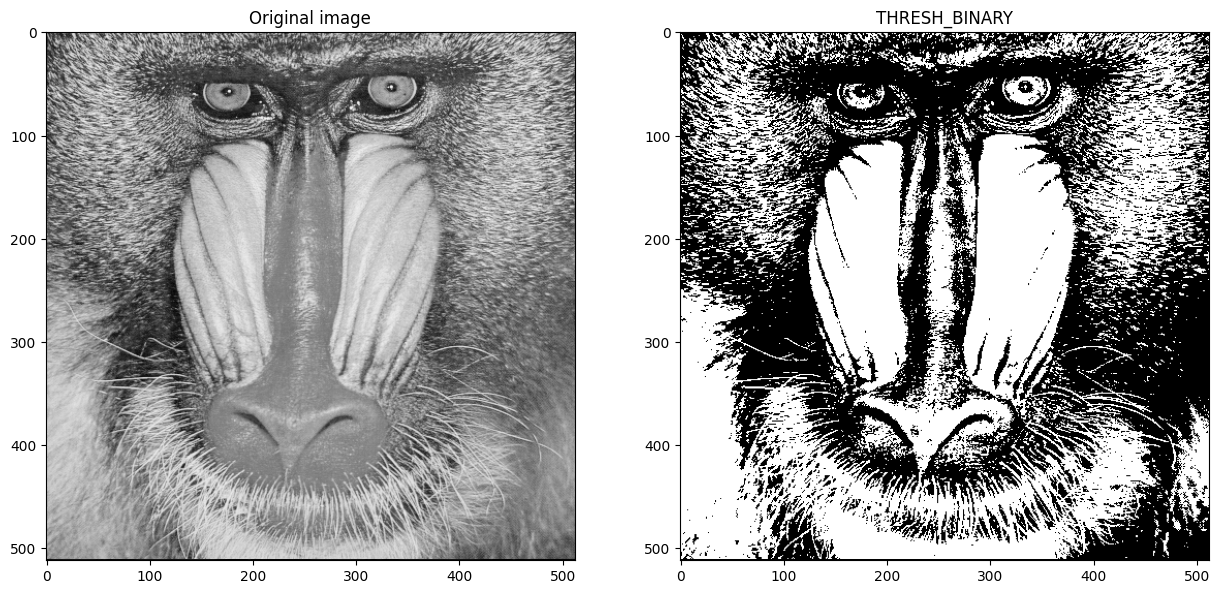

In [19]:
## Thresholding Binário / Limiarização
ret, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) #Range pode ser modificado...

# Plot
images = [img_gray, img_binary]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

#Otsu (Binarização de Otsu)
A binarização de Otsu é usada para executar a limiarização automática da imagem. Ele calcula automaticamente um valor limite do histograma da imagem para uma imagem bimodal.

A função cv2.threshold() é utilizada com um sinalizador extra, cv2.THRESH_OTSU.

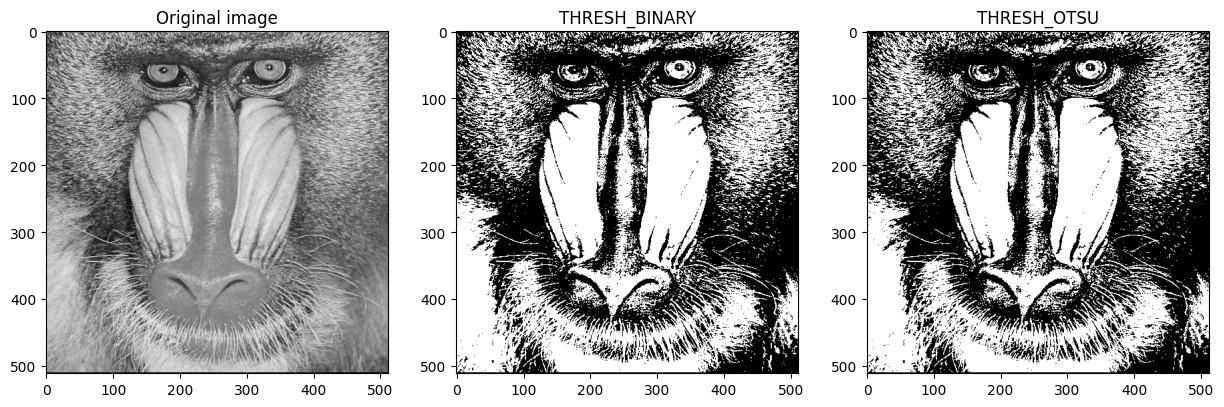

In [20]:
# Thresholding Global
ret,img_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

# Thresholding de Otsu
ret,img_otsu_binary = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plot the images
images = [img_gray, img_binary, img_otsu_binary]
titles = ['Original image', 'THRESH_BINARY', 'THRESH_OTSU']
plot_img(images, titles)

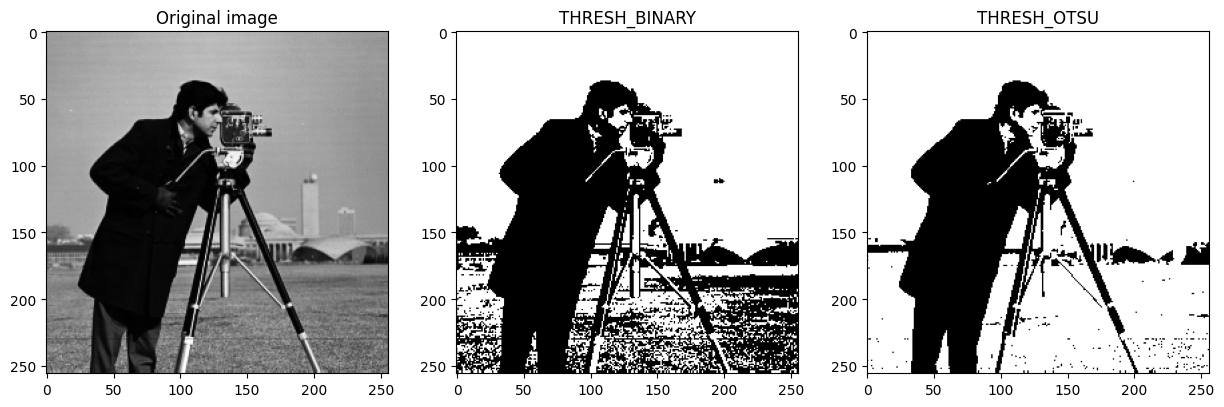

In [21]:
#Cameraman
cameraman1 = cv2.imread('/content/drive/MyDrive/MONITORIA/Imagens/cameraman.bmp')
cameraman = cv2.cvtColor(cameraman1,code=cv2.COLOR_BGR2GRAY)

# Thresholding Global
ret,img_binary = cv2.threshold(cameraman,127,255,cv2.THRESH_BINARY)

# Thresholding de Otsu
ret,img_otsu_binary = cv2.threshold(cameraman,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plot the images
images = [cameraman, img_binary, img_otsu_binary]
titles = ['Original image', 'THRESH_BINARY', 'THRESH_OTSU']
plot_img(images, titles)

#Para executar este Notebook:

- Adicione ao seu Drive as imagens [AQUI](https://drive.google.com/drive/folders/15FUG0Igsre7Vo6aABQocTJv90loAsbsR?usp=sharing) disponibilizadas;
- Edite os caminhos das Imagens para o seu diretório.

Este Notebook está diponível apenas para leitura. Para implementação e edição crie uma cópia (Arquivo -> Salvar uma cópia).

#Referências:

- Histogram equalization
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb)

- Equalização de Histograma: [Link](https://colab.research.google.com/github/leolca/notebooks/blob/master/aev/equalizacao-de-histograma.ipynb#scrollTo=yQBK6Ktfuqx5)

- Thresholding: [LINK](https://colab.research.google.com/github/Anspire/Notebooks/blob/master/Thresholding_image.ipynb#scrollTo=K-rH6VNv6EGT)